# Potential energy functions useful for toy modeling

- [Harmonic like potentials](#Harmonic-like-potentials)
- [Lennard-Jones like potentials](#Lennard-Jones-like-potentials)
- [Gaussian like potentials](#Gaussian-like-potentials)

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

---

## Harmonic like potentials

- [Harmonic potential](#Harmonic-potential)
- [Spring potential](#Spring-potential)
- [FENE potential](#FENE-potential)

### Harmonic potential

$$
\begin{gathered}
    u(r) = \frac{K}{2} r^2 ;
    \\
    \boldsymbol{F}(r) = -K \boldsymbol{r} .
\end{gathered}
$$

The parameter $ K $, called a spring constant, is sometimes defined so that the potential energy
reaches the thermal energy $ k_\mathrm{B} T $ around some defined distance $ \delta $:

$$
    K = \frac{2 k_\mathrm{B} T}{\delta^2} .
$$

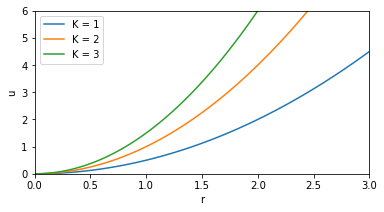

In [2]:
r = np.linspace(0, 3, num=100)
Ks = [1.0, 2.0, 3.0]

fig, ax = plt.subplots(figsize=(6, 3))
for K in Ks:
    u = K/2 * r * r
    ax.plot(r, u, label="K = {:g}".format(K))
ax.set_xlabel("r")
ax.set_ylabel("u")
ax.set_xlim(0, 3)
ax.set_ylim(0, 6)
ax.legend()
pass

### Spring potential

$$
\begin{gathered}
    u(r) = \frac{K}{2} \left( r - b \right)^2 ;
    \\
    \boldsymbol{F}(r) = K \left( \frac{b}{r} - 1 \right) \boldsymbol{r} .
\end{gathered}
$$

This potential is non-differentiable at $ r = 0 $.

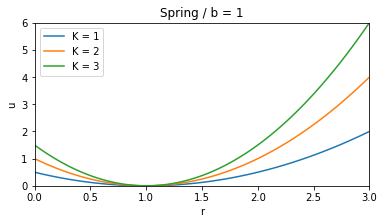

In [3]:
r = np.linspace(0.001, 3, num=100)
b = 1
Ks = [1.0, 2.0, 3.0]

fig, ax = plt.subplots(figsize=(6, 3))
for K in Ks:
    u = K/2 * (r - b)**2
    ax.plot(r, u, label="K = {:g}".format(K))
ax.set_xlabel("r")
ax.set_ylabel("u")
ax.set_xlim(0, 3)
ax.set_ylim(0, 6)
ax.set_title("Spring / b = {:g}".format(b))
ax.legend()
pass

### FENE potential

$$
\begin{gathered}
    u(r) = -\frac{K}{2} R_0^2 
        \ln \left( 1 - \left( \frac{r}{R_0} \right)^2 \right) ;
    \\
    \boldsymbol{F}(r) = -\frac{K \boldsymbol{r}}{1 - \left(r/R_0\right)^2} .
\end{gathered}
$$

This potential is undefined for $ r \ge R_0 $ .

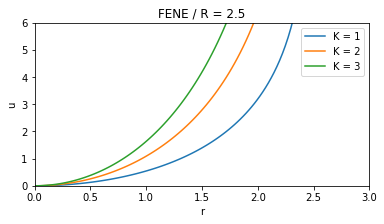

In [4]:
r = np.linspace(0.001, 2.499, num=100)
R = 2.5
Ks = [1.0, 2.0, 3.0]

fig, ax = plt.subplots(figsize=(6, 3))
for K in Ks:
    u = -K/2 * R**2 * np.log(1 - (r / R)**2)
    ax.plot(r, u, label="K = {:g}".format(K))
ax.set_xlabel("r")
ax.set_ylabel("u")
ax.set_xlim(0, 3)
ax.set_ylim(0, 6)
ax.set_title("FENE / R = {:g}".format(R))
ax.legend()
pass

---

## Lennard-Jones like potentials

- [Lennard-Jones potential](#Lennard-Jones-potential)
- [Weeks-Chandler-Andersen (WCA) potential](#Weeks-Chandler-Andersen-WCA-potential)
- [Soft-core Lennard-Jones potential](#Soft-core-Lennard-Jones-potential)

### Lennard-Jones potential

$$
\begin{gathered}
    u(r) =
        \varepsilon \left(
            \left(\frac{\sigma}{r}\right)^{12}
            - 2 \left(\frac{\sigma}{r}\right)^{6}
        \right) ;
    \\
    \boldsymbol{F}(r) =
        12 \varepsilon \left(
            \left(\frac{\sigma}{r}\right)^{12}
            - \left(\frac{\sigma}{r}\right)^{6}
        \right)
        \frac{\boldsymbol{r}}{r^2} .
\end{gathered}
$$

Sometimes a similar potential with different exponent is used and called Lennard-Jones $(2p, p)$ potential.

$$
\begin{gathered}
    u_p(r) =
        \varepsilon \left(
            \left(\frac{\sigma}{r}\right)^{2p}
            - 2 \left(\frac{\sigma}{r}\right)^{p}
        \right) ;
    \\
    \boldsymbol{F}_p(r) =
        2p \varepsilon \left(
            \left(\frac{\sigma}{r}\right)^{2p}
            - \left(\frac{\sigma}{r}\right)^{p}
        \right)
        \frac{\boldsymbol{r}}{r^2} .
\end{gathered}
$$

The original one is Lennard-Jones (12,6).

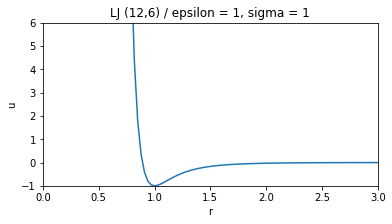

In [5]:
epsilon = 1.0
sigma = 1.0
r = np.linspace(0.001, 3, num=100)
u = epsilon * ((sigma / r)**12 - 2 * (sigma / r)**6)

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(r, u)
ax.set_xlabel("r")
ax.set_ylabel("u")
ax.set_xlim(0, 3)
ax.set_ylim(-1, 6)
ax.set_title("LJ (12,6) / epsilon = {:g}, sigma = {:g}".format(epsilon, sigma))
pass

### Weeks-Chandler-Andersen (WCA) potential

$$
\begin{gathered}
    u(r) =
        \varepsilon \left(
            \left(\frac{\sigma}{r}\right)^{12}
            - 2 \left(\frac{\sigma}{r}\right)^{6}
        \right)
        + \varepsilon ,
    \qquad r < \sigma ;
    \\
    \boldsymbol{F}(r) =
        12 \varepsilon \left(
            \left(\frac{\sigma}{r}\right)^{12}
            - \left(\frac{\sigma}{r}\right)^{6}
        \right)
        \frac{\boldsymbol{r}}{r^2} ,
    \qquad r < \sigma .
\end{gathered}
$$

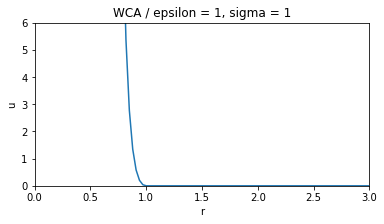

In [6]:
epsilon = 1.0
sigma = 1.0
r = np.linspace(0.001, 3, num=100)
t = np.maximum(sigma / r, 1)
u = epsilon * (t**12 - 2 * t**6) + epsilon

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(r, u)
ax.set_xlabel("r")
ax.set_ylabel("u")
ax.set_xlim(0, 3)
ax.set_ylim(0, 6)
ax.set_title("WCA / epsilon = {:g}, sigma = {:g}".format(epsilon, sigma))
pass

### Soft-core Lennard-Jones potential

$$
\begin{gathered}
    u_{k,p}(r) =
        \varepsilon \left[
            \frac{k + 1}{k + \left(r/\sigma\right)^p} - 1
        \right]^2 ;
    \\
    \boldsymbol{F}_{k,p}(r) =
        2 p \varepsilon
        \left( \frac{r}{\sigma} \right)^p
        \frac{k + 1}{\left(k + \left(r/\sigma\right)^p\right)^2}
        \left[
            \frac{k + 1}{k + \left(r/\sigma\right)^p} - 1
        \right]
        \frac{\boldsymbol{r}}{r^2} .
\end{gathered}
$$

The parameter $ k > 0 $ controls the _soft-ness_ of the core.
When $ k = 0 $ this function becomes the Lennard-Jones $(2p, p)$.

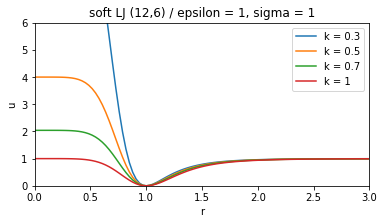

In [7]:
epsilon = 1.0
sigma = 1.0
ks = [0.3, 0.5, 0.7, 1.0]
r = np.linspace(0.001, 3, num=100)

fig, ax = plt.subplots(figsize=(6, 3))
for k in ks:
    u = epsilon * ((k + 1) / (k + (r / sigma)**6) - 1)**2
    ax.plot(r, u, label="k = {:g}".format(k))
ax.set_xlabel("r")
ax.set_ylabel("u")
ax.set_xlim(0, 3)
ax.set_ylim(0, 6)
ax.set_title("soft LJ (12,6) / epsilon = {:g}, sigma = {:g}".format(epsilon, sigma))
ax.legend()
pass

---

## Gaussian like potentials

- [Gaussian potential](#Gaussian-potential)
- [Power-approximated Gaussian potential](#Power-approximated-Gaussian-potential)
- [PL4 potential](#PL4-potential)

### Gaussian potential

$$
\begin{gathered}
    u(r) = \varepsilon \exp\left( -\frac{r^2}{2 \sigma^2} \right) ;
    \\
    \boldsymbol{F}(r) =
        \frac{\varepsilon}{\sigma^2}
        \exp\left( -\frac{r^2}{2 \sigma^2} \right)
        \boldsymbol{r} .
\end{gathered}
$$

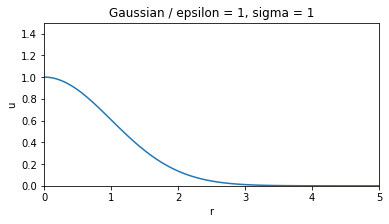

In [8]:
epsilon = 1.0
sigma = 1.0
r = np.linspace(0, 5, num=100)
u = epsilon * np.exp(-r**2 / (2 * sigma**2))

fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(r, u)
ax.set_xlabel("r")
ax.set_ylabel("u")
ax.set_xlim(0, 5)
ax.set_ylim(0, 1.5)
ax.set_title("Gaussian / epsilon = {:g}, sigma = {:g}".format(epsilon, sigma))
pass

### Power-approximated Gaussian potential

A power approximation of the Gaussian potential with exact cutoff at $ r = \sqrt{2p} \sigma $.

$$
\begin{gathered}
    u(r) =
        \varepsilon \left( 1 - \frac{r^2}{2 p \sigma^2} \right)^p ,
    \qquad
    r < \sqrt{2p} \sigma ;
    \\
    \boldsymbol{F}(r) =
        \frac{\varepsilon}{\sigma^2} \left( 1 - \frac{r^2}{2 p \sigma^2} \right)^{p-1} \boldsymbol{r} ,
    \qquad
    r < \sqrt{2p} \sigma .
\end{gathered}
$$

This potential is based on the approximation of the exponential function based on the formula

$$
    e^t = \lim_{p \to \infty} \left( 1 + \frac{t}{p} \right)^p
$$

where $ t = -r^2 / (2 \sigma^2) $.

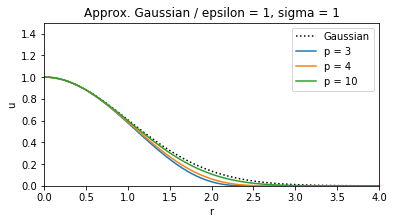

In [9]:
epsilon = 1.0
sigma = 1.0
ps = [3, 4, 10]

r = np.linspace(0, 4, num=100)

fig, ax = plt.subplots(figsize=(6, 3))

u = epsilon * np.exp(-r**2 / (2 * sigma**2))
ax.plot(r, u, label="Gaussian", color="k", ls=":")

for p in ps:
    u = epsilon * np.clip(1 - r**2 / (2 * p * sigma**2), 0, 1)**p
    ax.plot(r, u, label="p = {:d}".format(p))

ax.set_xlabel("r")
ax.set_ylabel("u")
ax.set_xlim(0, 4)
ax.set_ylim(0, 1.5)
ax.set_title("Approx. Gaussian / epsilon = {:g}, sigma = {:g}".format(epsilon, sigma))
ax.legend()
pass

### PL4 potential

A hand-tweaked variation of the power-approximated Gaussian potential with $ p = 4 $.

$$
\begin{gathered}
    u(r) =
        \varepsilon \left( 1 - \left( \frac{r}{3 \sigma} \right)^2 \right)^4 ,
    \qquad
    r < 3 \sigma ;
    \\
    \boldsymbol{F}(r) =
        \frac{8 \varepsilon}{9 \sigma^2} \left( 1 - \left( \frac{r}{3 \sigma} \right)^2 \right)^3 \boldsymbol{r} ,
    \qquad
    r < 3 \sigma .
\end{gathered}
$$

The fit around $ r = 0 $ gets worse but overall fit gets better.

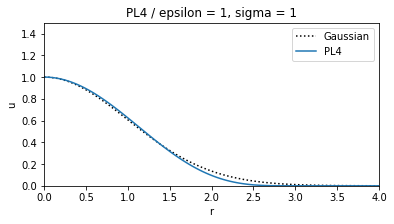

In [10]:
epsilon = 1.0
sigma = 1.0

r = np.linspace(0, 4, num=100)

fig, ax = plt.subplots(figsize=(6, 3))

u = epsilon * np.exp(-r**2 / (2 * sigma**2))
ax.plot(r, u, label="Gaussian", color="k", ls=":")

u = epsilon * np.clip(1 - (r / (3 * sigma))**2, 0, 1)**4
ax.plot(r, u, label="PL4")

ax.set_xlabel("r")
ax.set_ylabel("u")
ax.set_xlim(0, 4)
ax.set_ylim(0, 1.5)
ax.set_title("PL4 / epsilon = {:g}, sigma = {:g}".format(epsilon, sigma))
ax.legend()
pass